<a href="https://colab.research.google.com/github/Dianna22/ML/blob/master/SocialMediaBUZZ/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.preprocessing import normalize

In [0]:
from sklearn.metrics import f1_score, auc, accuracy_score, confusion_matrix, precision_score, balanced_accuracy_score, recall_score, roc_auc_score
from sklearn import tree
from sklearn.model_selection import KFold

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
PATH_PREFIX = '/content/gdrive/My Drive/ML/'

##### Load datasets

In [0]:
TWITTER_RELATIVE_500 = PATH_PREFIX + "data/Twitter-Relative-Sigma-500.data"

In [0]:
TWITTER_TRAIN = PATH_PREFIX + "data/train_500"
TWITTER_TEST = PATH_PREFIX + "data/test_500"
TWITTER_VAL = PATH_PREFIX + "data/val_500"

In [0]:
def load_dataset(path):
	data = pd.read_csv(path)
	return data[data.columns[:-1]], data[data.columns[-1]]

In [0]:
data_X, data_Y = load_dataset(TWITTER_RELATIVE_500)

In [0]:
X_train, Y_train = load_dataset(TWITTER_TRAIN)
X_val, Y_val = load_dataset(TWITTER_VAL)
X_test, Y_test = load_dataset(TWITTER_TEST)

In [0]:
print(Y_train.value_counts()[0]/Y_train.value_counts()[1])
print(Y_val.value_counts()[0]/Y_val.value_counts()[1])
print(Y_test.value_counts()[0]/Y_test.value_counts()[1])

37.076955602537
38.15304347826087
40.38529411764706


#### Normalization

##### Min-max normalization



```
# TODO normalization per feature vector (11)
```


In [0]:
norm_X_train = normalize(X_train, axis=0, norm='max')
norm_X_val = normalize(X_val, axis=0, norm='max')
norm_X_test = normalize(X_test, axis=0, norm='max')

In [19]:
pd.DataFrame(X_train).describe()

,Unnamed: 0,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
count,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.00000,90052.000000,90052.000000,90052.000000,...,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000
mean,70314.643695,171.771998,154.786135,164.797495,176.272021,186.467341,215.67742,243.088116,87.067872,78.694277,...,1.038297,1.110372,1.193454,172.330409,155.265746,165.268811,176.761749,186.993370,216.244992,243.701006
std,40590.715924,506.384320,468.363139,488.062360,522.865411,552.952547,626.37990,693.477620,235.195493,217.696152,...,1.314246,1.302927,1.583025,507.476487,469.249856,488.921779,523.796168,553.953944,627.412913,694.531571
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35112.750000,3.000000,2.000000,3.000000,3.000000,3.000000,4.00000,6.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000
50%,70403.500000,22.000000,19.000000,21.000000,22.000000,23.000000,28.00000,33.000000,13.000000,11.000000,...,1.000000,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,29.000000,33.000000
75%,105457.250000,125.000000,112.000000,119.000000,126.000000,133.000000,161.00000,186.000000,70.000000,64.000000,...,1.083333,1.100021,1.118081,125.000000,113.000000,120.000000,126.000000,133.000000,162.000000,187.000000
max,140706.000000,24210.000000,22899.000000,20015.000000,27007.000000,30957.000000,28603.00000,27449.000000,10170.000000,10036.000000,...,273.000000,181.000000,239.000000,24301.000000,22980.000000,20083.000000,27071.000000,31028.000000,28697.000000,27557.000000


In [22]:
pd.DataFrame(norm_X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,...,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000
mean,0.499727,0.007095,0.006760,0.008234,0.006527,0.006023,0.007540,0.008856,0.008561,0.007841,...,0.003803,0.006135,0.004994,0.007091,0.006757,0.008229,0.006530,0.006027,0.007535,0.008844
std,0.288479,0.020916,0.020453,0.024385,0.019360,0.017862,0.021899,0.025264,0.023126,0.021692,...,0.004814,0.007198,0.006624,0.020883,0.020420,0.024345,0.019349,0.017853,0.021863,0.025203
min,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249547,0.000124,0.000087,0.000150,0.000111,0.000097,0.000140,0.000219,0.000197,0.000199,...,0.003663,0.005525,0.004184,0.000123,0.000087,0.000149,0.000111,0.000097,0.000139,0.000218
50%,0.500359,0.000909,0.000830,0.001049,0.000815,0.000743,0.000979,0.001202,0.001278,0.001096,...,0.003663,0.005525,0.004184,0.000905,0.000827,0.001046,0.000813,0.000741,0.001011,0.001198
75%,0.749487,0.005163,0.004891,0.005946,0.004665,0.004296,0.005629,0.006776,0.006883,0.006377,...,0.003968,0.006077,0.004678,0.005144,0.004917,0.005975,0.004654,0.004286,0.005645,0.006786
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model construction

## Linear classifier

## Tree-based

In [0]:
kfold = KFold(10, True, 1)
stratified_kfold = KFold(10, True, 1)

#### Extra tree classifier

In [0]:
def buildET(X,Y,dt_criterion="gini", dt_class_weight=None):
  clf = tree.ExtraTreeClassifier(criterion=dt_criterion, class_weight=dt_class_weight)
  return clf.fit(train_X, train_Y)

In [25]:
results = pd.DataFrame(index=range(10))
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_stratified_kfold_denorm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs, bacc, tpr, tnr = [], [], [], [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = data_X.iloc[train_idx]
      test_X = data_X.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildET(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
      bacc.append(balanced_accuracy_score(test_Y, pred_Y))
      tpr.append(tp/(tp+fn))
      tnr.append(tn/(fp+tn))
    print(f'{criterion}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("AUC", criterion, str(class_weight)): w_aucs})
    bacc_df = pd.DataFrame({col_name % ("BACC", criterion, str(class_weight)): bacc})
    tpr_df = pd.DataFrame({col_name % ("TPR", criterion, str(class_weight)): tpr})
    tnr_df = pd.DataFrame({col_name % ("TNR", criterion, str(class_weight)): tnr})
    results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df], axis=1)


gini
entropy


In [27]:
results.describe().iloc[1]

F1_stratified_kfold_denorm_gini_balanced         0.412740
AUC_stratified_kfold_denorm_gini_balanced        0.692178
BACC_stratified_kfold_denorm_gini_balanced       0.692178
TPR_stratified_kfold_denorm_gini_balanced        0.398311
TNR_stratified_kfold_denorm_gini_balanced        0.986044
F1_stratified_kfold_denorm_entropy_balanced      0.429436
AUC_stratified_kfold_denorm_entropy_balanced     0.705552
BACC_stratified_kfold_denorm_entropy_balanced    0.705552
TPR_stratified_kfold_denorm_entropy_balanced     0.425716
TNR_stratified_kfold_denorm_entropy_balanced     0.985388
Name: mean, dtype: float64

#### Decision tree classifier

##### Normalized data

In [20]:
f1s = []
w_aucs = []
for train_idx, test_idx in kfold.split(data_X):
  train_X = normalize(data_X.iloc[train_idx], axis=0, norm='max')
  test_X = normalize(data_X.iloc[test_idx], axis=0, norm='max')
  train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  f1s.append(f1_score(test_Y, pred_Y))
  w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
  print(f'Fold {len(f1s)}')


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


In [25]:
strat_f1s = []
strat_w_aucs = []
for train_idx, test_idx in stratified_kfold.split(data_X):
  train_X = normalize(data_X.iloc[train_idx], axis=0, norm='max')
  test_X = normalize(data_X.iloc[test_idx], axis=0, norm='max')
  train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  strat_f1s.append(f1_score(test_Y, pred_Y))
  strat_w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
  print(f'Fold {len(f1s)}')


Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10


In [35]:
print(pd.DataFrame(pd.concat([pd.DataFrame({"F1":f1s}),pd.DataFrame({"Strat F1":strat_f1s})], axis=1)))
print(pd.DataFrame(pd.concat([pd.DataFrame({"w_AUC":w_aucs}),pd.DataFrame({"Strat w_auc":strat_w_aucs})], axis=1)))

         F1  Strat F1
0  0.195397  0.184303
1  0.212994  0.224354
2  0.193211  0.170330
3  0.251185  0.249800
4  0.212000  0.243012
5  0.181729  0.168999
6  0.225198  0.207916
7  0.225502  0.235702
8  0.365874  0.348485
9  0.285714  0.303585
      w_AUC  Strat w_auc
0  0.773348     0.750088
1  0.693776     0.688433
2  0.740431     0.695476
3  0.696530     0.692815
4  0.743157     0.753593
5  0.720147     0.690503
6  0.723814     0.690914
7  0.709674     0.725858
8  0.760986     0.766432
9  0.731688     0.732518


##### denormalized data

In [45]:
f1s = []
w_aucs = []
for train_idx, test_idx in kfold.split(data_X):
  train_X = data_X.iloc[train_idx]
  test_X = data_X.iloc[test_idx]
  train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
  clf = tree.DecisionTreeClassifier(criterion="entropy", class_weight="balanced")
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  f1s.append(f1_score(test_Y, pred_Y))
  w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
  print(f'Fold {len(f1s)}')


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


In [46]:
strat_f1s = []
strat_w_aucs = []
for train_idx, test_idx in stratified_kfold.split(data_X):
  train_X = data_X.iloc[train_idx]
  test_X = data_X.iloc[test_idx]
  train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
  clf = tree.DecisionTreeClassifier(criterion="entropy", class_weight="balanced")
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  strat_f1s.append(f1_score(test_Y, pred_Y))
  strat_w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
  print(f'Fold {len(strat_f1s)}')


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


In [47]:
print(pd.DataFrame(pd.concat([pd.DataFrame({"F1":f1s}),pd.DataFrame({"Strat F1":strat_f1s})], axis=1)))
print(pd.DataFrame(pd.concat([pd.DataFrame({"w_AUC":w_aucs}),pd.DataFrame({"Strat w_auc":strat_w_aucs})], axis=1)))

         F1  Strat F1
0  0.423803  0.416787
1  0.506849  0.519444
2  0.423756  0.414977
3  0.469444  0.455307
4  0.425287  0.434659
5  0.455090  0.447407
6  0.468244  0.476904
7  0.436997  0.446837
8  0.442455  0.458599
9  0.478947  0.478203
      w_AUC  Strat w_auc
0  0.710956     0.707816
1  0.760091     0.763419
2  0.701876     0.702836
3  0.730883     0.722360
4  0.699236     0.706091
5  0.719638     0.717859
6  0.719694     0.723501
7  0.706533     0.710689
8  0.711683     0.720712
9  0.729892     0.728663


#### Run multiple experiments

In [0]:
def buildDT(X,Y,dt_criterion="gini", dt_class_weight=None):
  clf = tree.DecisionTreeClassifier(criterion=dt_criterion, class_weight=dt_class_weight)
  return clf.fit(train_X, train_Y)

In [0]:
results = pd.DataFrame(index=range(10))
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_stratified_kfold_denorm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs, bacc, tpr, tnr = [], [], [], [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = data_X.iloc[train_idx]
      test_X = data_X.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
      bacc.append(balanced_accuracy_score(test_Y, pred_Y))
      tpr.append(tp/(tp+fn))
      tnr.append(tn/(fp+tn))
    print(f'{criterion}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("AUC", criterion, str(class_weight)): w_aucs})
    bacc_df = pd.DataFrame({col_name % ("BACC", criterion, str(class_weight)): bacc})
    tpr_df = pd.DataFrame({col_name % ("TPR", criterion, str(class_weight)): tpr})
    tnr_df = pd.DataFrame({col_name % ("TNR", criterion, str(class_weight)): tnr})
    results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df], axis=1)

In [0]:
results.describe()

##### Denormalized results

In [15]:
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_stratified_kfold_denorm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs, bacc, tpr, tnr = [], [], [], [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = data_X.iloc[train_idx]
      test_X = data_X.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
      bacc.append(balanced_accuracy_score(test_Y, pred_Y))
      tpr.append(tp/(tp+fn))
      tnr.append(tn/(fp+tn))
    print(f'{criterion}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("AUC", criterion, str(class_weight)): w_aucs})
    bacc_df = pd.DataFrame({col_name % ("BACC", criterion, str(class_weight)): bacc})
    tpr_df = pd.DataFrame({col_name % ("TPR", criterion, str(class_weight)): tpr})
    tnr_df = pd.DataFrame({col_name % ("TNR", criterion, str(class_weight)): tnr})
    results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df], axis=1)


gini
entropy


In [105]:
results

,F1_stratified_kfold_denorm_gini_balanced,AUC_stratified_kfold_denorm_gini_balanced,BACC_stratified_kfold_denorm_gini_balanced,TPR_stratified_kfold_denorm_gini_balanced,TNR_stratified_kfold_denorm_gini_balanced,F1_stratified_kfold_denorm_entropy_balanced,AUC_stratified_kfold_denorm_entropy_balanced,BACC_stratified_kfold_denorm_entropy_balanced,TPR_stratified_kfold_denorm_entropy_balanced,TNR_stratified_kfold_denorm_entropy_balanced
0,0.427935,0.708471,0.708471,0.431138,0.985805,0.418605,0.707925,0.707925,0.431138,0.984713
1,0.460870,0.723029,0.723029,0.459538,0.986521,0.513966,0.759120,0.759120,0.531792,0.986448
2,0.389937,0.688495,0.688495,0.391167,0.985822,0.407643,0.695240,0.695240,0.403785,0.986695
3,0.457300,0.726330,0.726330,0.467606,0.985054,0.472185,0.737488,0.737488,0.490141,0.984835
4,0.422695,0.700337,0.700337,0.415042,0.985633,0.421203,0.697734,0.697734,0.409471,0.985998
5,0.400602,0.690818,0.690818,0.395833,0.985803,0.456036,0.721053,0.721053,0.455357,0.986749
6,0.450633,0.707727,0.707727,0.429952,0.985502,0.462112,0.717132,0.717132,0.449275,0.984989
7,0.421199,0.691405,0.691405,0.396325,0.986485,0.432935,0.706277,0.706277,0.427822,0.984732
8,0.435724,0.697588,0.697588,0.408629,0.986546,0.443286,0.708314,0.708314,0.431472,0.985156
9,0.424411,0.692497,0.692497,0.398438,0.986556,0.484848,0.732605,0.732605,0.479167,0.986044


##### Normalized results

In [16]:
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_stratified_kfold_norm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs, bacc, tpr, tnr = [], [], [], [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = normalize(data_X.iloc[train_idx], axis=0, norm='max')
      test_X = normalize(data_X.iloc[test_idx], axis=0, norm='max')
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      N = sum(test_Y)
      P = len(test_Y)-N
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
      bacc.append(balanced_accuracy_score(test_Y, pred_Y))
      tpr.append(tp/(tp+fn))
      tnr.append(tn/(fp+tn))
    print(f'{criterion}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("AUC", criterion, str(class_weight)): w_aucs})
    bacc_df = pd.DataFrame({col_name % ("BACC", criterion, str(class_weight)): bacc})
    tpr_df = pd.DataFrame({col_name % ("TPR", criterion, str(class_weight)): tpr})
    tnr_df = pd.DataFrame({col_name % ("TNR", criterion, str(class_weight)): tnr})
    results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df], axis=1)

gini
entropy


In [19]:
results.describe().iloc[1]

F1_stratified_kfold_denorm_gini_balanced         0.430198
AUC_stratified_kfold_denorm_gini_balanced        0.703738
BACC_stratified_kfold_denorm_gini_balanced       0.703738
TPR_stratified_kfold_denorm_gini_balanced        0.421605
TNR_stratified_kfold_denorm_gini_balanced        0.985870
F1_stratified_kfold_denorm_entropy_balanced      0.456540
AUC_stratified_kfold_denorm_entropy_balanced     0.721000
BACC_stratified_kfold_denorm_entropy_balanced    0.721000
TPR_stratified_kfold_denorm_entropy_balanced     0.456233
TNR_stratified_kfold_denorm_entropy_balanced     0.985767
F1_stratified_kfold_norm_gini_balanced           0.057304
AUC_stratified_kfold_norm_gini_balanced          0.515324
BACC_stratified_kfold_norm_gini_balanced         0.515324
TPR_stratified_kfold_norm_gini_balanced          0.043239
TNR_stratified_kfold_norm_gini_balanced          0.987410
F1_stratified_kfold_norm_entropy_balanced        0.308010
AUC_stratified_kfold_norm_entropy_balanced       0.639634
BACC_stratifie

In [23]:
results.filter(regex="stratified_kfold_denorm_en").describe().iloc[1]

F1_stratified_kfold_denorm_entropy_balanced      0.456540
AUC_stratified_kfold_denorm_entropy_balanced     0.721000
BACC_stratified_kfold_denorm_entropy_balanced    0.721000
TPR_stratified_kfold_denorm_entropy_balanced     0.456233
TNR_stratified_kfold_denorm_entropy_balanced     0.985767
Name: mean, dtype: float64

In [0]:
results.describe().iloc[1].to_csv(PATH_PREFIX + "DT_results_5metrics")

In [0]:
res.to_csv(PATH_PREFIX + "DT_results_str-kfold_denorm")

In [0]:
r.to_csv(PATH_PREFIX + "DT_results_str-kfold_norm")

In [0]:
res = pd.DataFrame()
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_str-kfold_denorm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs = [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = data_X.iloc[train_idx]
      test_X = data_X.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      print(f'Fold {len(f1s)}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("WAUC", criterion, str(class_weight)): w_aucs})
    res = pd.concat([res, f1_df, auc_df], axis=1)


In [83]:
r = pd.DataFrame()
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_str-kfold_norm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs = [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = normalize(data_X.iloc[train_idx], axis=0, norm='max')
      test_X = normalize(data_X.iloc[test_idx], axis=0, norm='max')
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      print(f'Fold {len(f1s)}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("WAUC", criterion, str(class_weight)): w_aucs})
    r = pd.concat([r, f1_df, auc_df], axis=1)

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


#### Evaluation

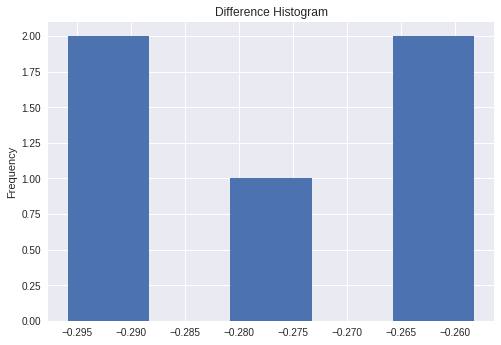

In [77]:
(results["F1_kfold_denorm_gini_None"]-results["WAUC_kfold_denorm_gini_None"]).plot(kind='hist', title= 'Difference Histogram')

In [26]:
clf.score(X_test, Y_test) 

0.9710752611754673

In [0]:
# from sklearn.model_selection import cross_val_score

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [0]:
Y_pred = clf.predict(X_test)

In [75]:
f1 = f1_score(Y_test, Y_pred)
f1_macro = f1_score(Y_test, Y_pred, average='macro')
f1_micro = f1_score(Y_test, Y_pred, average='micro')
f1_weighted = f1_score(Y_test, Y_pred, average='weighted')


print(f"""F1 score: {f1}
F1 macro: {f1_macro}
F1 micro: {f1_micro}
F1 weighted: {f1_weighted}""")
# auc_score = auc(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
w_auc = roc_auc_score(Y_test, Y_pred, average="weighted")
auc = roc_auc_score(Y_test, Y_pred)

w_acc = balanced_accuracy_score(Y_test, Y_pred)
print(f"""
Accuracy: {acc}
confusion_matrix: {cm}
Precision: {prec}
Recall: {rec}
Weighted auc: {w_auc}
Auc: {auc}
Weighted acc: {w_acc}""")

F1 score: 0.45387205387205387
F1 macro: 0.7195362568672301
F1 micro: 0.9711818634070073
F1 weighted: 0.9723618799436571

Accuracy: 0.9711818634070073
confusion_matrix: [[26994   468]
 [  343   337]]
Precision: 0.4186335403726708
Recall: 0.49558823529411766
Weighted auc: 0.7392732524515159
Auc: 0.7392732524515159
Weighted acc: 0.7392732524515159


## Distance-based

## Rule-based

## Ensemble